In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [6]:
#Lists and counters
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [7]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
            
        if index_counter > 49:
            index_counter = 1
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter}: {city}") 
  
  
    except(KeyError, IndexError):
        print("Record does not exist; searching for next record...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1: jamestown
Processing Record 2 of Set 1: bluff
Processing Record 3 of Set 1: bredasdorp
Record does not exist; searching for next record...
Processing Record 4 of Set 1: chokurdakh
Processing Record 5 of Set 1: sokolo
Processing Record 6 of Set 1: san pedro
Processing Record 7 of Set 1: arraial do cabo
Processing Record 8 of Set 1: rikitea
Record does not exist; searching for next record...
Processing Record 9 of Set 1: tasiilaq
Processing Record 10 of Set 1: butaritari
Processing Record 11 of Set 1: saldanha
Processing Record 12 of Set 1: portland
Processing Record 13 of Set 1: xiaoshi
Processing Record 14 of Set 1: dikson
Processing Record 15 of Set 1: kodiak
Processing Record 16 of Set 1: mataura
Processing Record 17 of Set 1: vardo
Processing Record 18 of Set 1: barrow
Processing Record 19 of Set 1: khorramshahr
Processing Record 20 of Set 1: atuona
Processing Record 21 of Set 1: tiksi
Processing R

Processing Record 32 of Set 4: kaitangata
Processing Record 33 of Set 4: grand gaube
Processing Record 34 of Set 4: middelburg
Processing Record 35 of Set 4: anchorage
Processing Record 36 of Set 4: chuy
Processing Record 37 of Set 4: yumen
Processing Record 38 of Set 4: jacala
Processing Record 39 of Set 4: guarapari
Record does not exist; searching for next record...
Processing Record 40 of Set 4: kavieng
Processing Record 41 of Set 4: bykovo
Processing Record 42 of Set 4: vila franca do campo
Processing Record 43 of Set 4: carupano
Record does not exist; searching for next record...
Processing Record 44 of Set 4: pijijiapan
Processing Record 45 of Set 4: cartagena
Processing Record 46 of Set 4: saint anthony
Processing Record 47 of Set 4: uray
Processing Record 48 of Set 4: arlo
Processing Record 49 of Set 4: manta
Processing Record 50 of Set 4: biak
Processing Record 1 of Set 5: pasni
Processing Record 2 of Set 5: atar
Processing Record 3 of Set 5: vostok
Processing Record 4 of Set

Processing Record 20 of Set 8: omsukchan
Processing Record 21 of Set 8: kukuna
Processing Record 22 of Set 8: chumikan
Processing Record 23 of Set 8: dzhebariki-khaya
Processing Record 24 of Set 8: jatiroto
Processing Record 25 of Set 8: aden
Processing Record 26 of Set 8: sasovo
Processing Record 27 of Set 8: alofi
Processing Record 28 of Set 8: winnemucca
Record does not exist; searching for next record...
Processing Record 29 of Set 8: usinsk
Processing Record 30 of Set 8: hoquiam
Record does not exist; searching for next record...
Processing Record 31 of Set 8: tautira
Processing Record 32 of Set 8: bousso
Processing Record 33 of Set 8: walvis bay
Record does not exist; searching for next record...
Processing Record 34 of Set 8: mitsamiouli
Processing Record 35 of Set 8: palmer
Processing Record 36 of Set 8: barajevo
Processing Record 37 of Set 8: champerico
Processing Record 38 of Set 8: salym
Processing Record 39 of Set 8: clarence town
Processing Record 40 of Set 8: padang
Recor

Processing Record 3 of Set 12: naryan-mar
Processing Record 4 of Set 12: taicheng
Processing Record 5 of Set 12: erzin
Processing Record 6 of Set 12: mana
Processing Record 7 of Set 12: tonj
Processing Record 8 of Set 12: panaba
Processing Record 9 of Set 12: martapura
Processing Record 10 of Set 12: brownsville
Processing Record 11 of Set 12: chernogorsk
Processing Record 12 of Set 12: waitati
Processing Record 13 of Set 12: gladstone
Processing Record 14 of Set 12: penzance
Processing Record 15 of Set 12: ayagoz
Processing Record 16 of Set 12: aqtobe
Record does not exist; searching for next record...
Processing Record 17 of Set 12: lucapa
Record does not exist; searching for next record...
Processing Record 18 of Set 12: alanya
Processing Record 19 of Set 12: poddorye
Processing Record 20 of Set 12: diffa
Processing Record 21 of Set 12: selenginsk
Processing Record 22 of Set 12: vichuga
Processing Record 23 of Set 12: yashkino
Record does not exist; searching for next record...
Proc

In [8]:
# Create a panda data frame using data retrieved
weather_dictionary = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Latitude" : lat_list,
                "Longitude" : lng_list,
                "Maximum Temperature" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [14]:
# Count data
weather_dictionary.count()

City                   577
Cloudiness             577
Country                577
Date                   577
Humidity               577
Latitude               577
Longitude              577
Maximum Temperature    577
Wind Speed             577
dtype: int64

In [15]:
# Display the Data Frame
weather_dictionary

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Maximum Temperature,Wind Speed
0,Jamestown,0,US,1646454527,56,42.0970,-79.2353,27.34,3.44
1,Bluff,100,NZ,1646454527,70,-46.6000,168.3333,71.80,8.59
2,Bredasdorp,12,ZA,1646454528,94,-34.5322,20.0403,61.29,1.14
3,Chokurdakh,38,RU,1646454529,99,70.6333,147.9167,-19.28,1.21
4,Sokolo,91,ML,1646454529,13,14.7328,-6.1219,72.88,9.17
...,...,...,...,...,...,...,...,...,...
572,Yashkino,100,RU,1646454737,91,55.8736,85.4265,18.55,8.52
573,Nyurba,100,RU,1646454828,86,63.2842,118.3319,7.38,5.06
574,Sola,31,VU,1646454829,71,-13.8833,167.5500,82.67,4.03
575,Yeppoon,43,AU,1646454829,72,-23.1333,150.7333,92.98,10.09


In [16]:
# Save city data into a csv file
weather_dictionary.to_csv("../output_data/cities.csv", index = False)

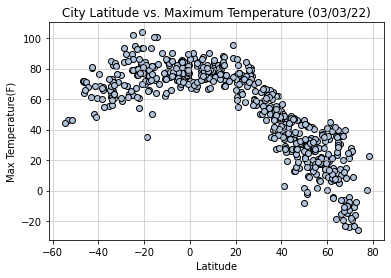

In [28]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dictionary["Latitude"], weather_dictionary["Maximum Temperature"], facecolor = "lightsteelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Maximum Temperature (03/03/22)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature(F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

The chart above shows that the highest temperature is located at approximately -20 latitude. Further, the lowest temperature at approximately 70 latitude. 

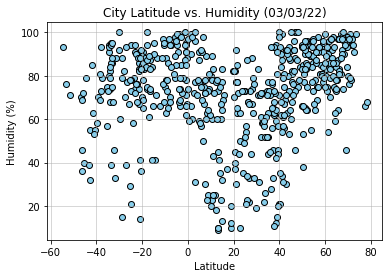

In [30]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dictionary["Latitude"], weather_dictionary["Humidity"], facecolor = "skyblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (03/03/22)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

The chart above shows a significant cluster between the latitudes of 40 and 80. 

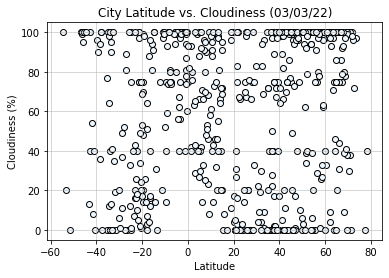

In [33]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dictionary["Latitude"], weather_dictionary["Cloudiness"], facecolor = "aliceblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (03/03/22)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

The chart above shows significant clusters between the latitudes of 80 and 100. 

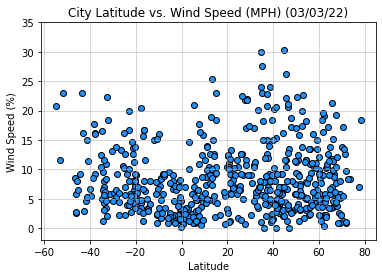

In [37]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dictionary["Latitude"], weather_dictionary["Wind Speed"], facecolor = "dodgerblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (MPH) (03/03/22)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,35)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (MPH).png")

The chart above shows that the highest wind speeds are located around the latitude of 40.

In [38]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dictionary.loc[weather_dictionary["Latitude"] >= 0]
southern_hemisphere = weather_dictionary.loc[weather_dictionary["Latitude"] < 0]

In [39]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-squared is : -0.89


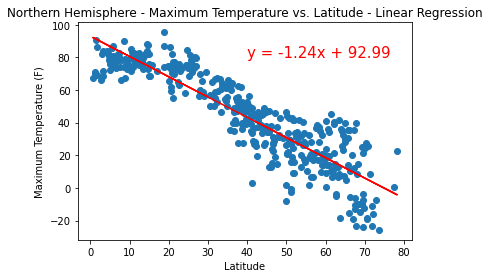

In [44]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Latitude"], northern_hemisphere["Maximum Temperature"])

# Call an function #2
annotate(equation, 40, 80)

# Set a title
plt.title("Northern Hemisphere - Maximum Temperature vs. Latitude - Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Maximum Temperature (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Maximum Temperature vs. Latitude - Linear Regression.png")

The chart above shows that there is a strong, negative relationship between latitude and maximum temperature in the northern hemisphere. Therefore, the higher the latitude, the lower the maximum temperature. 

The r-squared is : 0.42


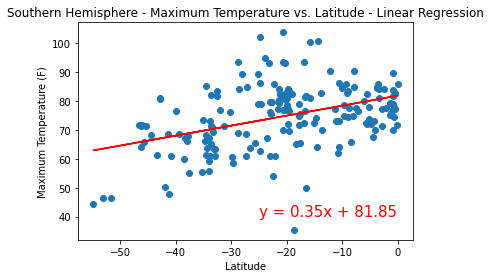

In [46]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Latitude"],southern_hemisphere["Maximum Temperature"])

# Call an function #2
annotate(equation, -25, 40)

# Set a title
plt.title("Southern Hemisphere - Maximum Temperature vs. Latitude - Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Maximum Temperature (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Maximum Temperature vs. Latitude - Linear Regression.png")

The chart above shows that there is a slightly positive relationship between latitude and maximum temperature in the southern hemisphere.

The r-squared is : 0.43


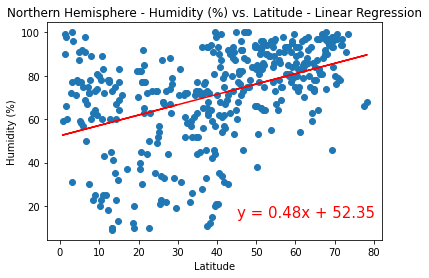

In [48]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Latitude"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 45, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude - Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude - Linear Regression.png")

The chart above shows that there is a slightly positive relationship between latitude and humidity in the northern hemisphere.

The r-squared is : 0.3


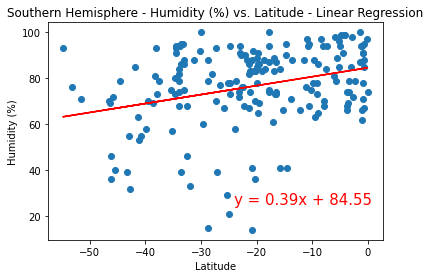

In [57]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Latitude"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -24, 25)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude - Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude - Linear Regression.png")

The chart above shows that there is a slightly positive relationship between latitude and humidity in the southern hemisphere.

The r-squared is : 0.2


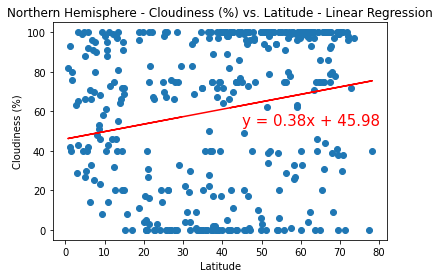

In [62]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Latitude"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 45, 53)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude - Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude - Linear Regression.png")

The chart above shows that there is a slightly positive relationship between latitude and cloudiness in the northern hemisphere.

The r-squared is : 0.29


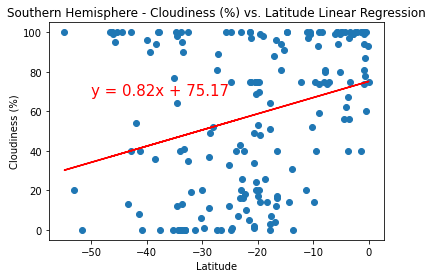

In [65]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Latitude"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -50, 68)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude - Linear Regression.png")

The chart above shows that there is a slightly positive relationship between latitude and cloudiness in the southern hemisphere.

The r-squared is : 0.03


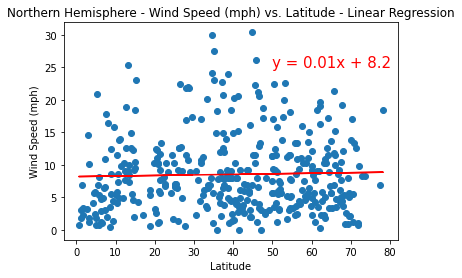

In [69]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Latitude"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 50, 25)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude - Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude - Linear Regression.png")

The chart above shows that there is a slightly positive relationship between latitude and wind speed in the northern hemisphere.

The r-squared is : -0.38


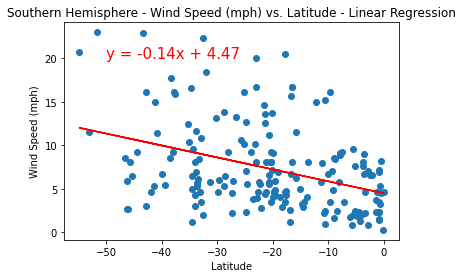

In [72]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Latitude"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -50, 20)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude - Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude - Linear Regression.png")

The chart above shows that there is a slightly negative relationship between latitude and wind speed in the southern hemisphere.